# Итоговое задание
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить **влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.**

И сделать это можно с помощью модели, которая предсказывала бы **результаты госэкзамена по математике** для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

# Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 **school** — аббревиатура школы, в которой учится ученик

2 **sex** — пол ученика ('F' - женский, 'M' - мужской)

3 **age** — возраст ученика (от 15 до 22)

4 **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5 **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6 **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 **schoolsup** — дополнительная образовательная поддержка (yes или no)

17 **famsup** — семейная образовательная поддержка (yes или no)

18 **paid** — дополнительные платные занятия по математике (yes или no)

19 **activities** — дополнительные внеучебные занятия (yes или no)

20 **nursery** — посещал детский сад (yes или no)

21 **higher** — хочет получить высшее образование (yes или no)

22 **internet** — наличие интернета дома (yes или no)

23 **romantic** — в романтических отношениях (yes или no)

24 **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 **absences** — количество пропущенных занятий

29 **score** — баллы по госэкзамену по математике


# Рекомендации по выполнению проекта

- Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
- Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- Оцените количество уникальных значений для номинативных переменных.
- По необходимости преобразуйте данные
- Проведите корреляционный анализ количественных переменных
- Отберите не коррелирующие переменные.
- Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [100]:
stud_math = pd.read_csv(
    '/Users/vramich/Documents/SF/Unit_2_data_analysis/project_02/data/stud_math.xls')
display(stud_math)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [101]:
# first stat info numeric columns
stud_math.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,392.0,2.750000,1.098127,0.0,2.0,3.0,4.0,4.0
Fedu,371.0,2.614555,2.228732,0.0,2.0,2.0,3.0,40.0
traveltime,367.0,1.438692,0.694181,1.0,1.0,1.0,2.0,4.0
studytime,388.0,2.038660,0.842078,1.0,1.0,2.0,2.0,4.0
failures,373.0,0.337802,0.743135,0.0,0.0,0.0,0.0,3.0
"studytime, granular",388.0,-6.115979,2.526235,-12.0,-6.0,-6.0,-3.0,-3.0
famrel,368.0,3.937500,0.927277,-1.0,4.0,4.0,5.0,5.0
freetime,384.0,3.231771,0.993940,1.0,3.0,3.0,4.0,5.0
goout,387.0,3.105943,1.115896,1.0,2.0,3.0,4.0,5.0


In [102]:
# first stat info  non numeric columns
stud_math.describe(include=['O']).T

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,378,2,U,295
famsize,368,2,GT3,261
Pstatus,350,2,T,314
Mjob,376,5,other,133
Fjob,359,5,other,197
reason,378,4,course,137
guardian,364,3,mother,250
schoolsup,386,2,no,335


In [103]:
stud_math.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

# first observations
- 395 observation
- 30 columns (from 0 to 29)
- 13 numeric columns
- 17 string type columns
- we have many nan' in the dataset -> clean
- we have two columns with studytime -> check the differences

In [104]:
# check the differences between studitime & 'studytime, granular'

print('these are studytime values', stud_math.studytime.value_counts())
print('these are "studytime, granular" values',
      stud_math['studytime, granular'].value_counts())

these are studytime values 2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
these are "studytime, granular" values -6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64


As studytime means how much time children invest into homework at home, numbers can't be negative.

**DECISION:** delete studytime, granulat variable from the dataset

In [105]:
# delete variable studytime, granular
stud_math = stud_math.drop(['studytime, granular'], axis=1)
# check
np.where(stud_math.columns == 'studytime, granular')

(array([], dtype=int64),)

### rename all columns to lower case

In [106]:
print(stud_math.columns)
stud_math.columns = stud_math.columns.str.lower()
print(stud_math.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')
Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')


# PART II
## analyse numeric variables

## 1. AGE


In [107]:
print(len(stud_math.age))

395


In [108]:
age = stud_math.groupby(by='age')['school'].agg('count').reset_index()
display(age)

,age,school
0,15,82
1,16,104
2,17,98
3,18,82
4,19,24
5,20,3
6,21,1
7,22,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

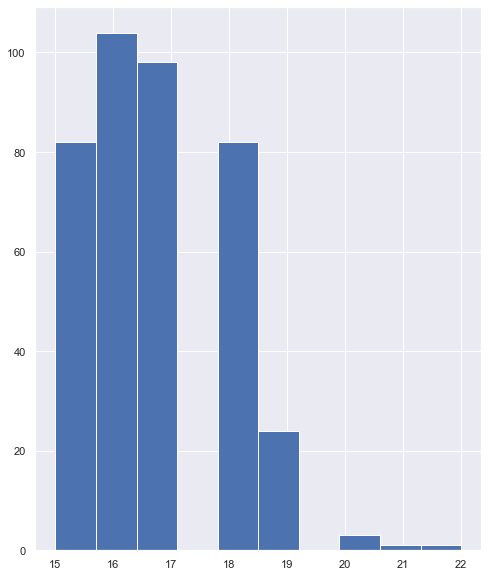

In [109]:
stud_math.age.hist()
stud_math.age.describe()

- as we can see, we don't have any nan's in age variable
- age range lies between 15 and 22
- the most students are between 15 and 18 years old
- let's check if the values 20 - 22 are outliers

In [110]:
print('perc 25% is:', stud_math.age.quantile(0.25))
print('perc 75% is:', stud_math.age.quantile(0.75))
print('perc IQR is:', stud_math.age.quantile(
    0.75) - stud_math.age.quantile(0.25))
print('outliers are:', stud_math.age.quantile(0.75) + 1.5 *
      (stud_math.age.quantile(0.75) - stud_math.age.quantile(0.25)), '+')

perc 25% is: 16.0
perc 75% is: 18.0
perc IQR is: 2.0
outliers are: 21.0 +


Values 21 and 22 are outliers -> remove them from dataset

In [111]:
stud_math = stud_math.loc[stud_math.age < 21]
# check again
age = stud_math.groupby(by='age')['school'].agg('count').reset_index()
display(age)

,age,school
0,15,82
1,16,104
2,17,98
3,18,82
4,19,24
5,20,3


# medu - образование матери: 
- 0:  нет, 
- 1: 4 класса, 
- 2: 5-9 классы, 
- 3: среднее специальное или 11 классов, 
- 4: высшее

In [112]:
stud_math.medu.describe()

count    390.000000
mean       2.753846
std        1.097285
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

In [113]:
print(stud_math.medu.unique())

[ 4.  1.  3.  2. nan  0.]


- we have nan observation -> replace trought most frequent value

In [114]:
medu = stud_math.groupby(by='medu')['age'].agg('count').reset_index()
medu

,medu,age
0,0.0,3
1,1.0,58
2,2.0,102
3,3.0,96
4,4.0,131


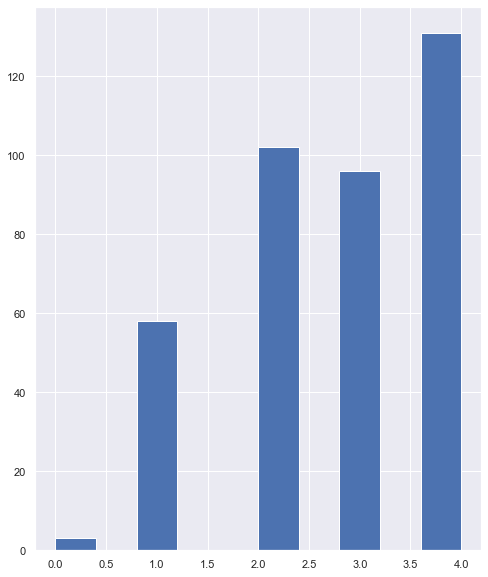

In [115]:
stud_math.medu.hist()

- as we can see the most mothers have high level of education followed by 5-9 classes and medium level of education


In [116]:
stud_math.medu = stud_math.medu.fillna(4)
medu = stud_math.groupby(by='medu')['age'].agg('count').reset_index()
print(medu)
print(stud_math.medu.unique())

   medu  age
0   0.0    3
1   1.0   58
2   2.0  102
3   3.0   96
4   4.0  134
[4. 1. 3. 2. 0.]


### Fedu — образование отца 
- 0:  нет, 
- 1: 4 класса, 
- 2: 5-9 классы, 
- 3: среднее специальное или 11 классов, 
- 4: высшее

In [117]:
stud_math.fedu.describe()

count    369.000000
mean       2.623306
std        2.231591
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

In [118]:
print(stud_math.fedu.unique())
print('we have ', stud_math.fedu.isna().sum(), 'nans in fedu')

[ 4.  1.  2.  3. 40. nan  0.]
we have  24 nans in fedu


In [119]:
fedu = stud_math.groupby(by='fedu')['age'].count()
fedu

fedu
0.0       2
1.0      76
2.0     106
3.0      96
4.0      88
40.0      1
Name: age, dtype: int64

- as we can see, there is one value == 40, we don't have it in the data description -> delete 
- replace nan throught most frequent value (2)

In [120]:
stud_math = stud_math.loc[stud_math.fedu != 40]
stud_math.fedu = stud_math.fedu.fillna(2)
# check again
fedu = stud_math.groupby(by='fedu')['age'].agg('count').reset_index()
display(fedu)

,fedu,age
0,0.0,2
1,1.0,76
2,2.0,130
3,3.0,96
4,4.0,88


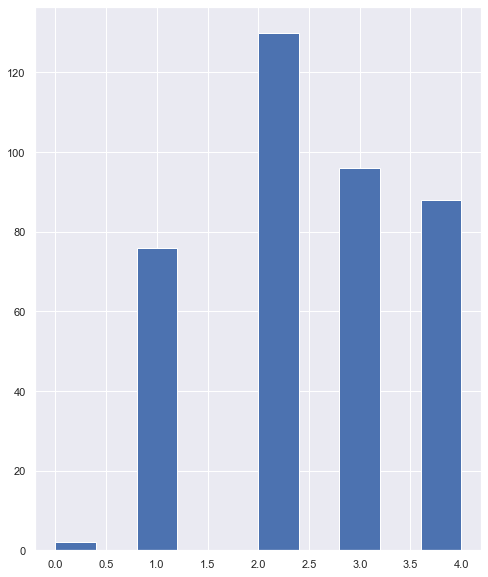

In [121]:
stud_math.fedu.hist()

replace nan throught None

## traveltime

время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)



In [122]:
print(stud_math.traveltime.describe())
print(stud_math.traveltime.unique())
print(stud_math.traveltime.isna().sum())

count    364.000000
mean       1.436813
std        0.691441
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
[ 2.  1.  3. nan  4.]
28


replace nan to None

In [123]:
travel = stud_math.groupby(by='traveltime')['age'].agg('count').reset_index()
travel

,traveltime,age
0,1.0,240
1,2.0,96
2,3.0,21
3,4.0,7


- we can see that the most students live in the school area and need less than 15 min to school. Only 7 student need more that one hour to school.
- we can see this observation on the histogramm below

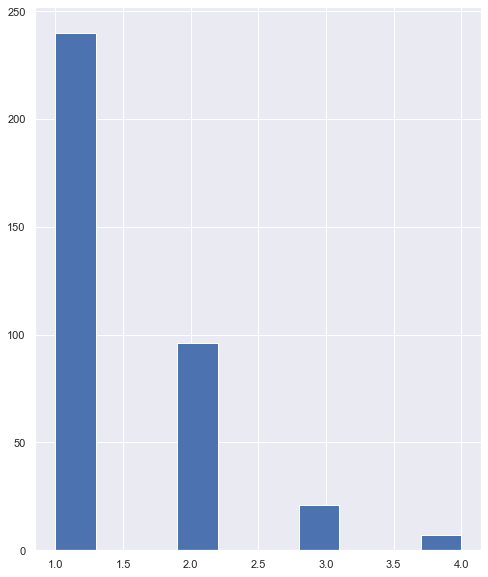

In [124]:
stud_math.traveltime.hist()

we have 28 na values in travelime, replace them with most frequen value '1'

In [125]:
stud_math.traveltime = stud_math.traveltime.fillna(1)
# check
travel = stud_math.groupby(by='traveltime')['age'].agg('count').reset_index()
travel

,traveltime,age
0,1.0,268
1,2.0,96
2,3.0,21
3,4.0,7


## studytime
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)



In [126]:
print(stud_math.studytime.unique())
print(stud_math.studytime.describe())
print('studytime hast ', stud_math.studytime.isna().sum(), 'NaNs')

[ 2.  3.  1. nan  4.]
count    385.000000
mean       2.041558
std        0.840596
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
studytime hast  7 NaNs


- we consider some nan, replace throught None

In [127]:
study = stud_math.groupby(by='studytime')['age'].agg('count')
study

studytime
1.0    101
2.0    194
3.0     63
4.0     27
Name: age, dtype: int64

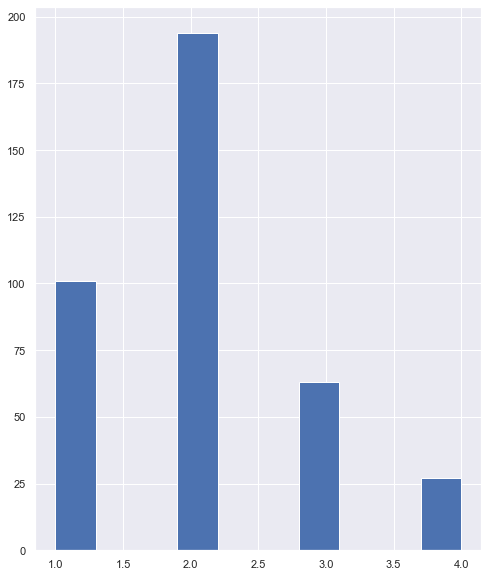

In [128]:
stud_math.studytime.hist()

- we can see, that most studens need about 2.5 hours to study at home


In [129]:
# replace na's with most frequent value
stud_math.studytime = stud_math.studytime.fillna(2)
# check
study = stud_math.groupby(by='studytime')['age'].agg('count')
study

studytime
1.0    101
2.0    201
3.0     63
4.0     27
Name: age, dtype: int64

## failures
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [130]:
print(stud_math.failures.unique())
print(stud_math.failures.describe())
print('failures has ', stud_math.failures.isna().sum(), 'nans')

[ 0.  3. nan  2.  1.]
count    370.000000
mean       0.324324
std        0.719607
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
failures has  22 nans


In [131]:
fail = stud_math.groupby(by='failures')['age'].agg('count')
fail

failures
0.0    292
1.0     49
2.0     16
3.0     13
Name: age, dtype: int64

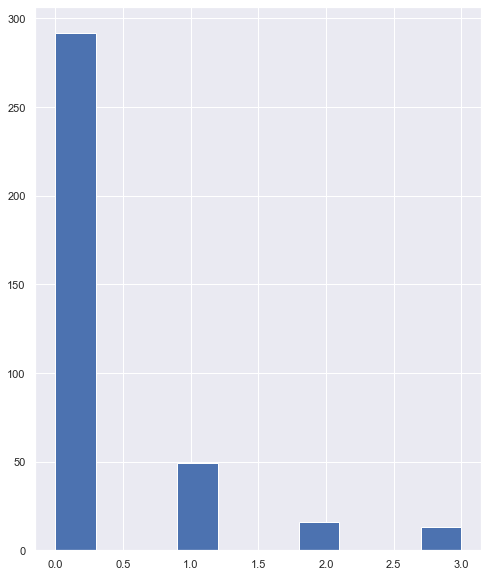

In [132]:
stud_math.failures.hist()

- we consider, that mostly students had not failures, but 13 students had 3 failures
- we have also about 24 nan's, replace them throught None

In [133]:
# replace na's with most frequent value
stud_math.failures = stud_math.failures.fillna(0)
# check
fail = stud_math.groupby(by='failures')['age'].agg('count')
fail

failures
0.0    314
1.0     49
2.0     16
3.0     13
Name: age, dtype: int64

## famrel
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [134]:
print(stud_math.famrel.unique())
print(stud_math.famrel.describe())
print('family relationship has ', stud_math.famrel.isna().sum(), 'nans')

[ 4.  5.  3. nan -1.  2.  1.]
count    365.000000
mean       3.928767
std        0.926040
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
family relationship has  27 nans


- we can observe the missing values, recode it to most frequent value, 
- min, value is -1, wich in dot in the data description - delete these entries

In [135]:
famrel = stud_math.groupby(by='famrel')['age'].agg('count').reset_index()
famrel

,famrel,age
0,-1.0,1
1,1.0,7
2,2.0,17
3,3.0,62
4,4.0,182
5,5.0,96


In [136]:
stud_math = stud_math.loc[stud_math.famrel != -1]
stud_math.famrel = stud_math.famrel.fillna(4)
# check again
famrel = stud_math.groupby(by='famrel')['age'].agg('count').reset_index()
famrel

,famrel,age
0,1.0,7
1,2.0,17
2,3.0,62
3,4.0,209
4,5.0,96


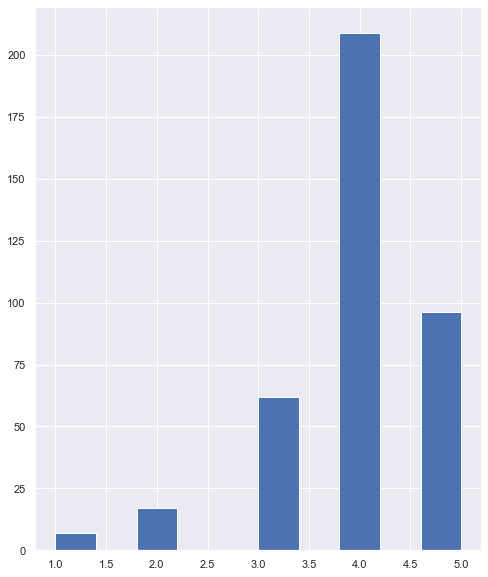

In [137]:
stud_math.famrel.hist()

we can see, that most of studens have good relationship in their families. There are some students with very bad relationshion, it is interesting for the modelation if it has an impact on the math exams

## freetime
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [138]:
print(stud_math.freetime.unique())
print(stud_math.freetime.describe())
print('freetime has ', stud_math.freetime.isna().sum(), 'nans')

[ 3.  2.  4.  1.  5. nan]
count    380.000000
mean       3.231579
std        0.990217
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
freetime has  11 nans


we can observe 11 missing values - replace thruoght most frequent value

In [139]:
freetime = stud_math.groupby(by='freetime')['age'].agg('count').reset_index()
freetime

,freetime,age
0,1.0,18
1,2.0,61
2,3.0,153
3,4.0,111
4,5.0,37


In [140]:
stud_math.freetime = stud_math.freetime.fillna(3)
freetime = stud_math.groupby(by='freetime')['age'].agg('count').reset_index()
freetime

,freetime,age
0,1.0,18
1,2.0,61
2,3.0,164
3,4.0,111
4,5.0,37


## goout

проведение времени с друзьями (от 1 - очень мало до 5 - очень много)


In [141]:
print(stud_math.goout.unique())
print(stud_math.goout.describe())
print('freetime has ', stud_math.goout.isna().sum(), 'nans')

[ 4.  3.  2.  1.  5. nan]
count    383.000000
mean       3.107050
std        1.114647
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
freetime has  8 nans


In [142]:
goout = stud_math.groupby(by='goout')['age'].agg('count').reset_index()
goout

,goout,age
0,1.0,23
1,2.0,99
2,3.0,126
3,4.0,84
4,5.0,51


we observe 8 misssing values, the most frequent value is 3 - replace missings throght most frequent value

   goout  age
0    1.0   23
1    2.0   99
2    3.0  134
3    4.0   84
4    5.0   51


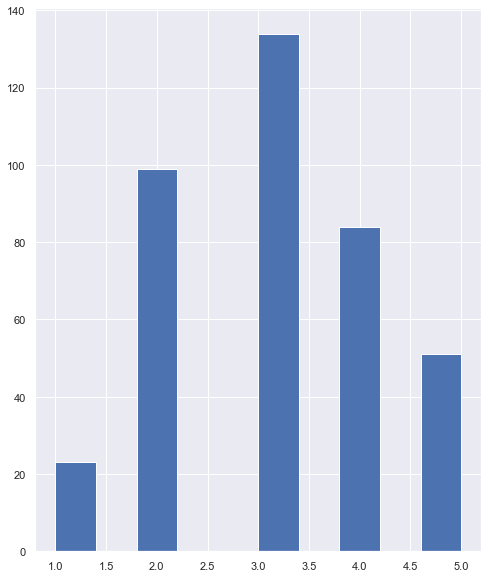

In [143]:
stud_math.goout = stud_math.goout.fillna(3)
# check
goout = stud_math.groupby(by='goout')['age'].agg('count').reset_index()
print(goout)
stud_math.goout.hist()

## health
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [144]:
print(stud_math.health.unique())
print(stud_math.health.describe())
print('health has ', stud_math.health.isna().sum(), 'nans')
health = stud_math.groupby(by='health')['age'].agg('count').reset_index()
print(health)

[ 3.  5.  1.  2.  4. nan]
count    376.000000
mean       3.534574
std        1.394800
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
health has  15 nans
   health  age
0     1.0   46
1     2.0   43
2     3.0   88
3     4.0   62
4     5.0  137


- we have values between 1 and 5, the most studenst have good health (5)
- we also see 8 missings - replace them through 5

   health  age
0     1.0   46
1     2.0   43
2     3.0   88
3     4.0   62
4     5.0  152


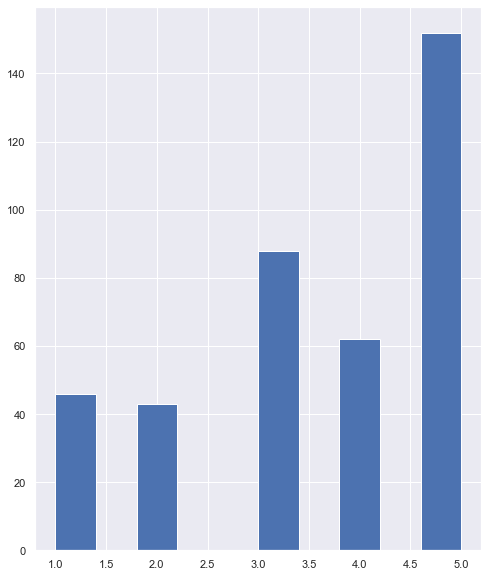

In [145]:
stud_math.health = stud_math.health.fillna(5)
# check
health = stud_math.groupby(by='health')['age'].agg('count').reset_index()
print(health)
stud_math.health.hist()

## absences
количество пропущенных занятий

[  6.   4.  10.   2.   0.  16.  nan   7.   8.  25.  14.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
count    379.000000
mean       7.258575
std       23.580587
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
absences has  12 nans
    absences  age
0        0.0  111
1        1.0    3
2        2.0   60
3        3.0    7
4        4.0   52
5        5.0    5
6        6.0   31
7        7.0    6
8        8.0   21
9        9.0    3
10      10.0   17
11      11.0    2
12      12.0   12
13      13.0    2
14      14.0   11
15      15.0    2
16      16.0    6
17      17.0    1
18      18.0    5
19      19.0    1
20      20.0    4
21      21.0    1
22      22.0    3
23      23.0    1
24      24.0    1
25      25.0    1
26      26.0    1
27      28.0    1
28      30.0    1
29      38.0    1
30      40.0    1
31      54.0    1
32  

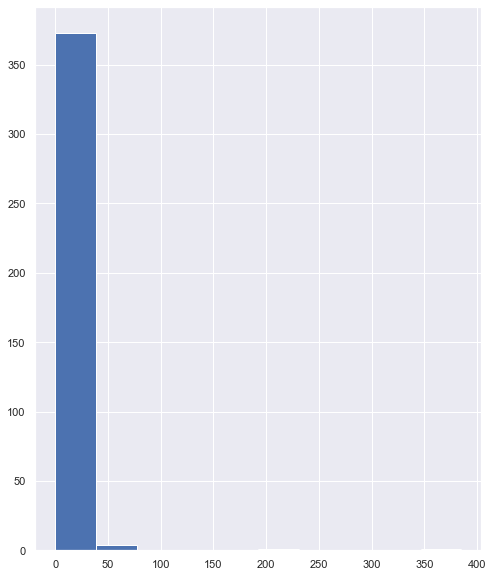

In [146]:
print(stud_math.absences.unique())
print(stud_math.absences.describe())
print('absences has ', stud_math.absences.isna().sum(), 'nans')
absences = stud_math.groupby(by='absences')['age'].agg('count').reset_index()
print(absences)
stud_math.absences.hist()

- we can observe 12 nans in absence varíable
- the values lies between 0 and 385, 
- the mean value is ca. 7.25, it seems like we have outliers
- check & and clean them
- check the distribution again 

In [147]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25- quantile: {},'.format(perc25), '75-quantile: {},'.format(perc75), "IQR: {}, ".format(IQR),
      "confidence interval: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25- quantile: 0.0, 75-quantile: 8.0, IQR: 8.0,  confidence interval: [-12.0, 20.0].


- we delete all entries with absences more than 20
- replece nan's troght most frequent valie '0'

    absences  age
0        0.0  111
1        1.0    3
2        2.0   60
3        3.0    7
4        4.0   52
5        5.0    5
6        6.0   31
7        7.0    6
8        8.0   21
9        9.0    3
10      10.0   17
11      11.0    2
12      12.0   12
13      13.0    2
14      14.0   11
15      15.0    2
16      16.0    6
17      17.0    1
18      18.0    5
19      19.0    1
20      20.0    4


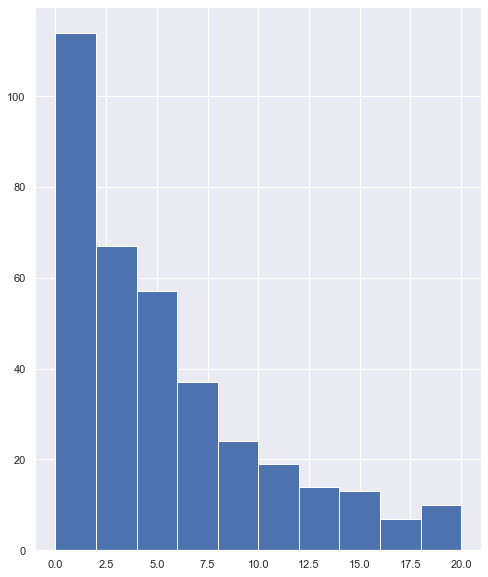

In [148]:
stud_math = stud_math.loc[stud_math.absences <= 20]
stud_math.absences = stud_math.absences.fillna(0)
absences = stud_math.groupby(by='absences')['age'].agg('count').reset_index()
print(absences)
stud_math.absences.hist()

## score
баллы по госэкзамену по математике

[ 30.  50.  75.  55.  95.  45.  70.  80.  25.  60.  85.  90.  65. 100.
  35.  40.   0.  nan]
count    357.000000
mean      52.086835
std       23.045528
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
score has  5 nans
    score  age
0     0.0   36
1    25.0    7
2    30.0   14
3    35.0    8
4    40.0   24
5    45.0   23
6    50.0   53
7    55.0   42
8    60.0   28
9    65.0   30
10   70.0   27
11   75.0   31
12   80.0   16
13   85.0    3
14   90.0    9
15   95.0    5
16  100.0    1


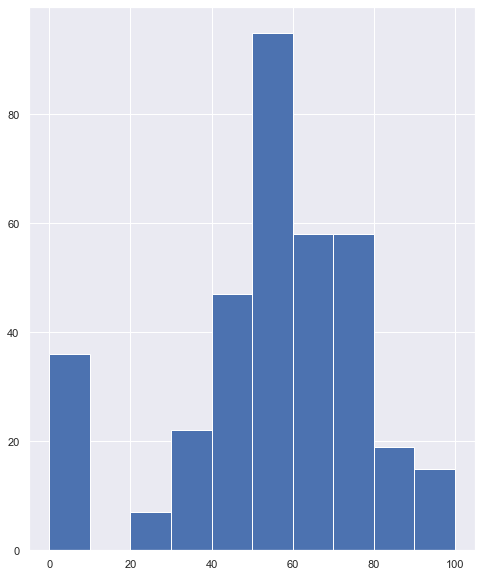

In [149]:
print(stud_math.score.unique())
print(stud_math.score.describe())
print('score has ', stud_math.score.isna().sum(), 'nans')
score = stud_math.groupby(by='score')['age'].agg('count').reset_index()
print(score)
stud_math.score.hist()

- score has 5 nan's, replace the values with median
- mean value 52, standard deviation 23 and 25 percentile lies by 45% and 75 percentile lies by 70. let's check for outliers
- we have 36 pbservation with value 0

In [150]:
median = stud_math.score.median()
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25- quantile: {},'.format(perc25), '75-quantile: {},'.format(perc75), "IQR: {}, ".format(IQR),
      "confidence interval: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25- quantile: 45.0, 75-quantile: 70.0, IQR: 25.0,  confidence interval: [7.5, 107.5].


    score  age
0    25.0    7
1    30.0   14
2    35.0    8
3    40.0   24
4    45.0   23
5    50.0   53
6    55.0   42
7    60.0   28
8    65.0   30
9    70.0   27
10   75.0   31
11   80.0   16
12   85.0    3
13   90.0    9
14   95.0    5
15  100.0    1


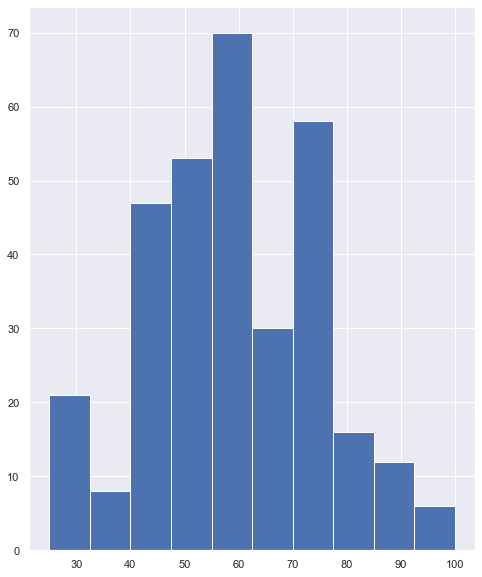

In [151]:
# delete vaslues smaler than 7.5
stud_math = stud_math.loc[stud_math.score >= 7.5]
stud_math.score = stud_math.score.ffill()
score = stud_math.groupby(by='score')['age'].agg('count').reset_index()
print(score)
stud_math.score.hist()

In [152]:
print(stud_math.score.describe())
print('median is: ', stud_math.score.median())

count    321.000000
mean      57.928349
std       15.855535
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
median is:  55.0


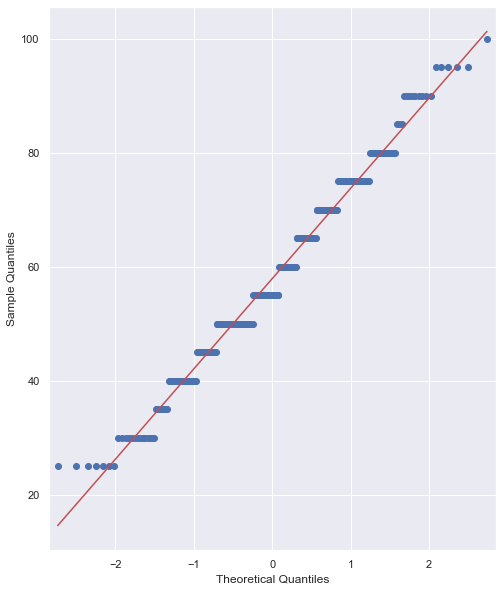

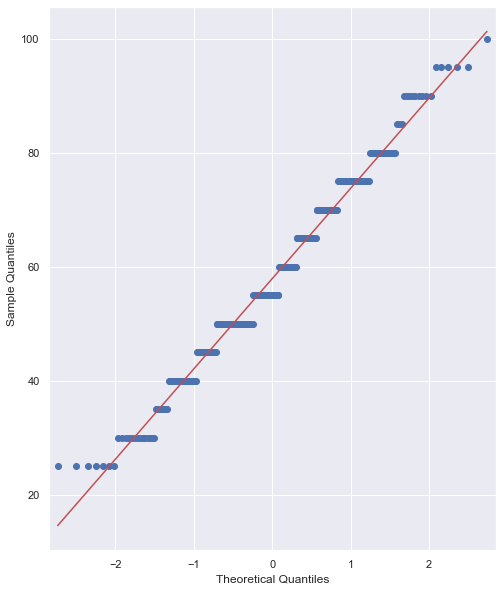

In [153]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(stud_math['score'], line='s')

In [154]:
import scipy
stat, p = scipy.stats.normaltest(stud_math.score)  # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=3.613, p-value=0.164
Принять гипотезу о нормальности


# correations 
 - after we cleand all numeric vaiebles, let's check for correlations between score and all others variobale to select feature for the model

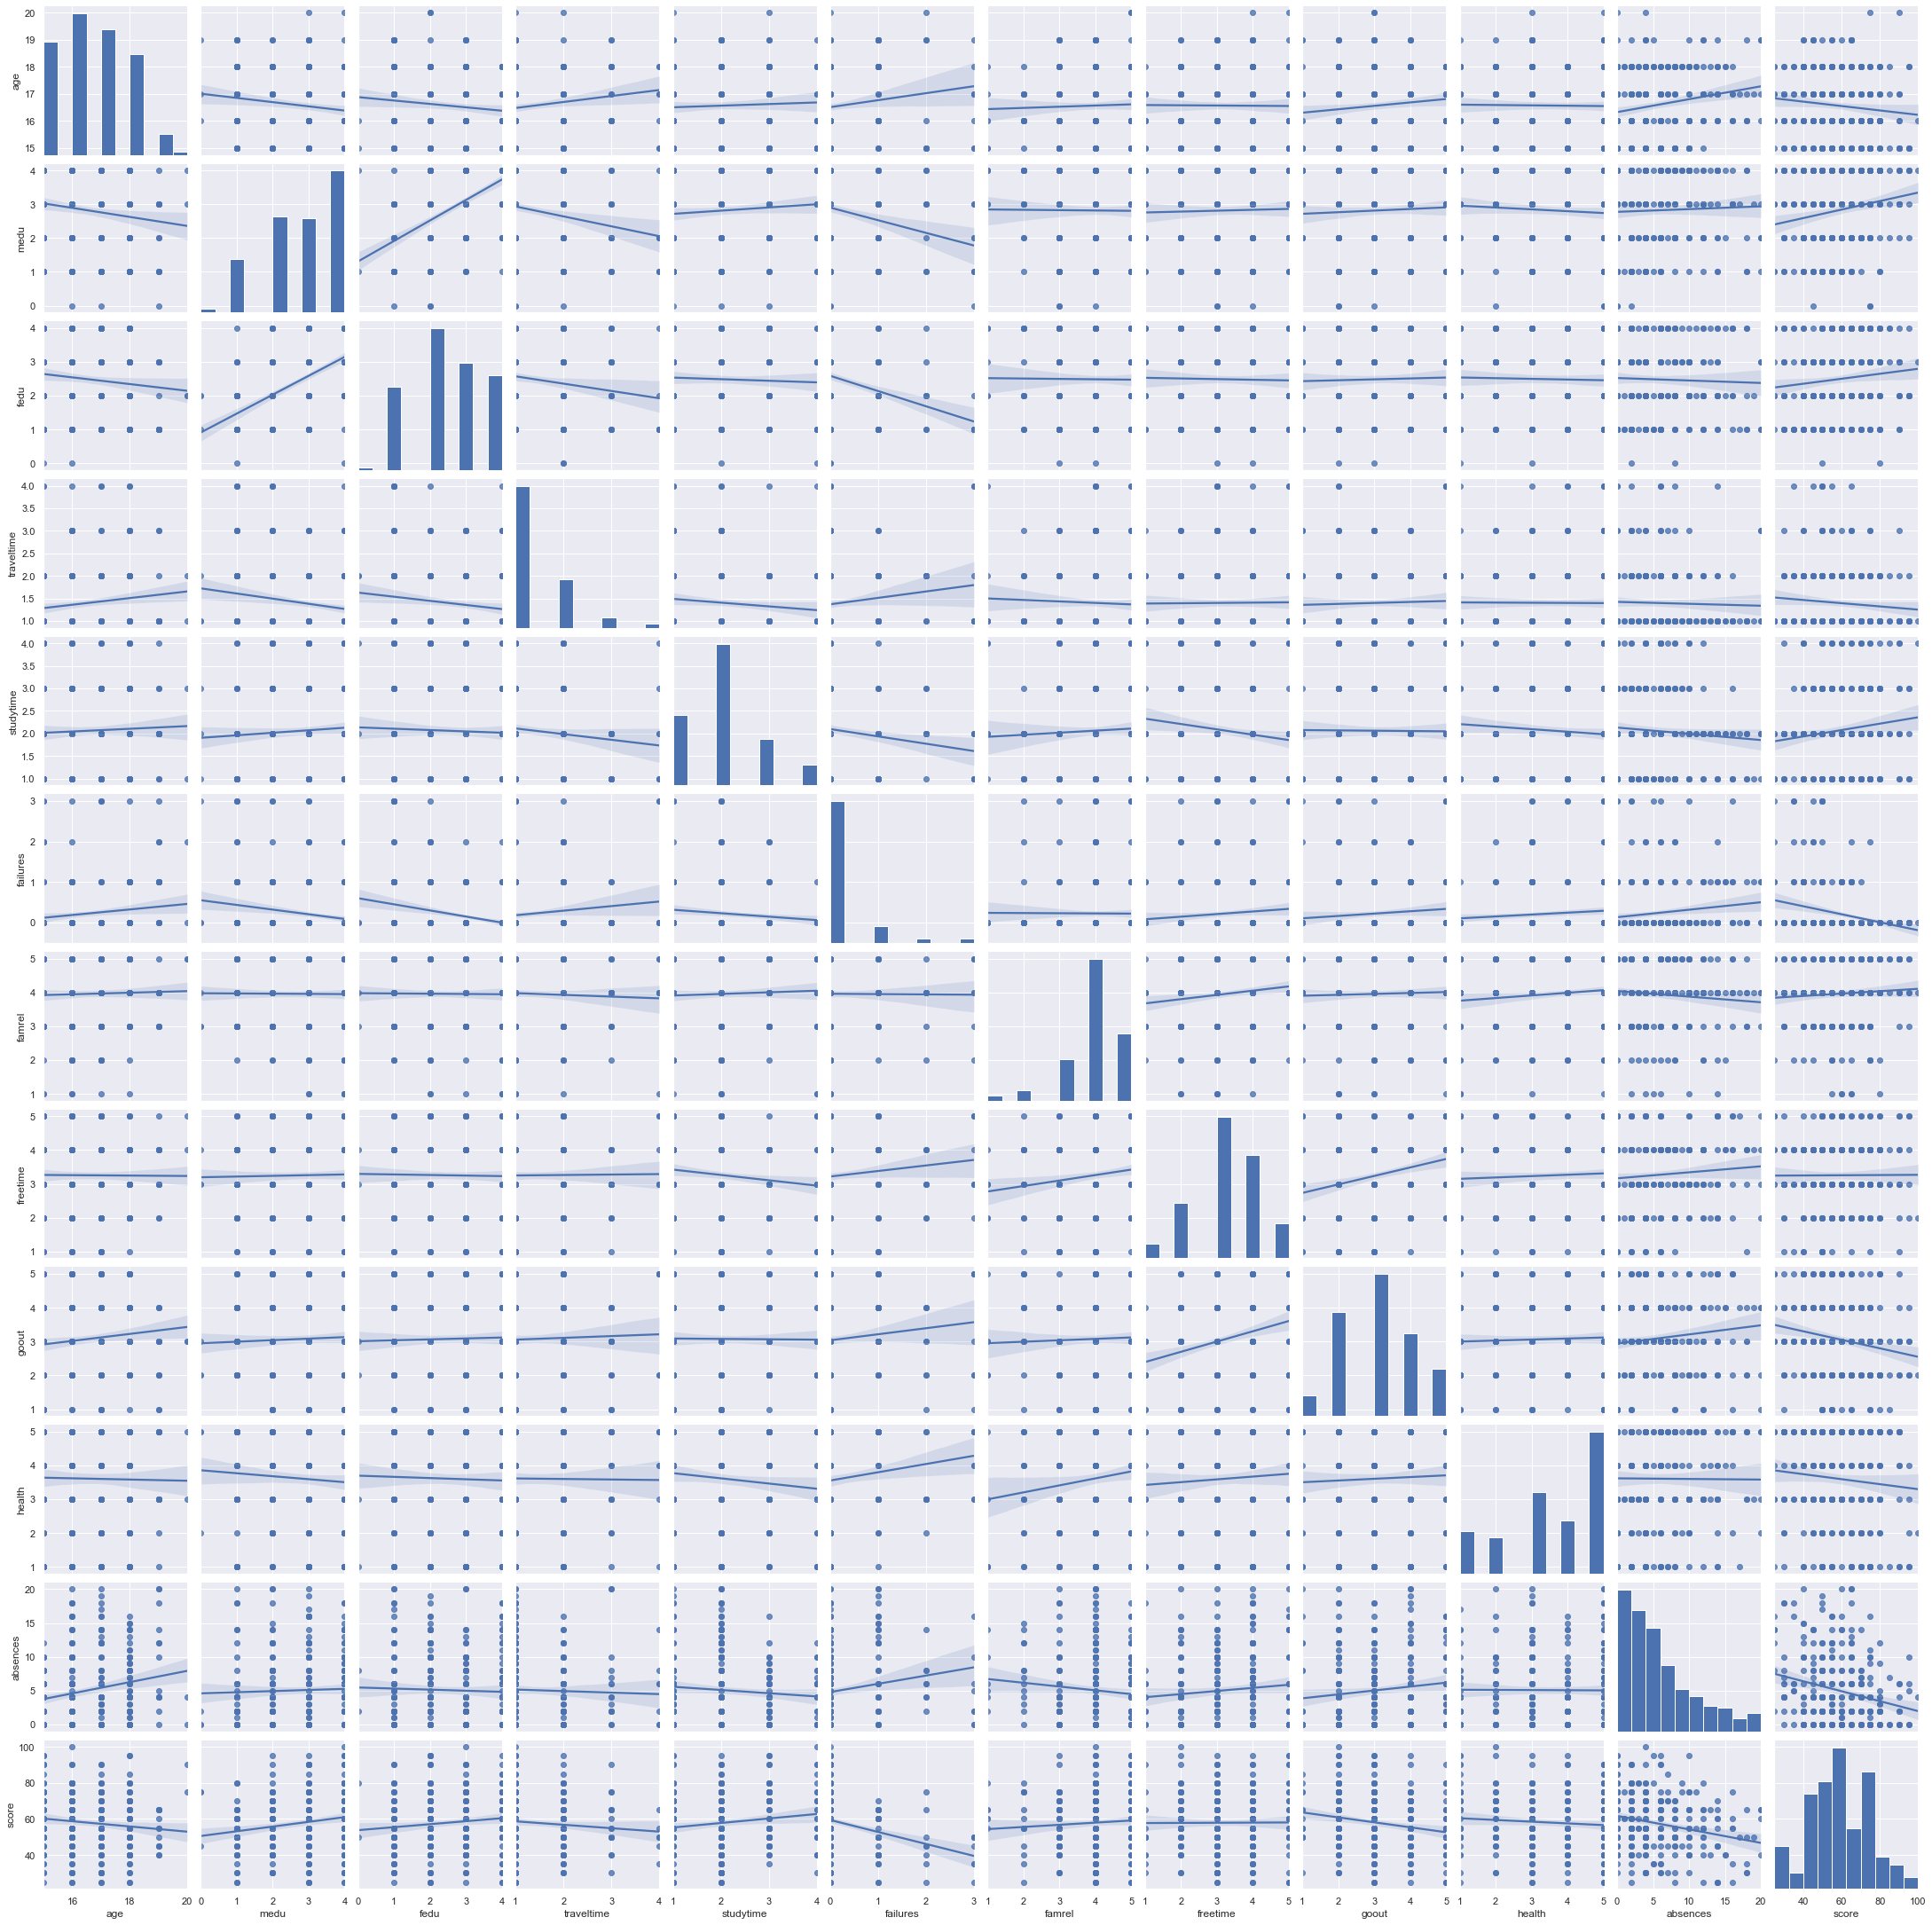

In [155]:
sns.pairplot(stud_math, kind='reg')

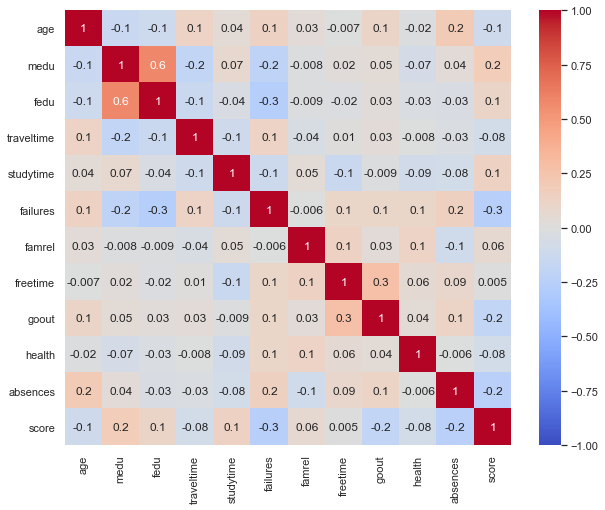

In [159]:
sns.heatmap(stud_math.corr(), annot=True, fmt='.1g',
            vmin=-1, vmax=1, center=0, cmap='coolwarm')
sns.set(rc={'figure.figsize': (12, 8)})

- as we can see, we have very poor correlation between score and other variables 
- we have strong correlation between medua & fedu, as the variable are similar and correation between mathers eduction and score is higher, we would suggest to take only mothers education as input for the model
- moreover there is a correlation between freetime and goout, that is why it would make sense to take only one. when we look into the correation between score and freetime, it lies by zero and the correlation between go out and score is negative, that's why I wolud suggest to take goout instead of freetime

**DECITION**
- we will take following vaiables for mdel building:
**age, medu, studitime, failures, goout, absences**


In [160]:
var_for_model = ['fedu', 'traveltime', 'famrel', 'freetime', 'health']

# PART II
## analyse non numeric variables


# school
 аббревиатура школы, в которой учится ученик

In [161]:
print(stud_math.school.unique())
print('school has ', stud_math.school.isna().sum(), 'nans')
school = stud_math.groupby(by='school')['age'].agg('count').reset_index()
print(school)

['GP' 'MS']
school has  0 nans
  school  age
0     GP  283
1     MS   38


- the most studens comes from GP school
- we don't have any nan's, further we will look for denpendecies between score ane non numeric variables, that's why, we will less this variable like it is

# sex	
пол ученика ('F' - женский, 'M' - мужской)


In [162]:
print(stud_math.sex.unique())
print('sex has ', stud_math.sex.isna().sum(), 'nans')
sex = stud_math.groupby(by='sex')['age'].agg('count').reset_index()
sex

['F' 'M']
sex has  0 nans


,sex,age
0,F,164
1,M,157


- there are no missing values
- we have 50/50 male female distribution

# address
тип адреса ученика ('U' - городской, 'R' - за городом)


In [163]:
print(stud_math.address.unique())
print('address has ', stud_math.address.isna().sum(), 'nans')
address = stud_math.groupby(by='address')['age'].agg('count').reset_index()
address

['U' nan 'R']
address has  13 nans


,address,age
0,R,67
1,U,241


In [164]:
# replace missing denpending on distribution of values in the var
stud_math.address = stud_math.address.ffill()
address = stud_math.groupby(by='address')['age'].agg('count').reset_index()
address

,address,age
0,R,72
1,U,249


# famsize
размер семьи('LE3' <= 3, 'GT3' >3)



In [165]:
print(stud_math.famsize.unique())
print('famsize has ', stud_math.famsize.isna().sum(), 'nans')
famsize = stud_math.groupby(by='famsize')['age'].agg('count').reset_index()
famsize

[nan 'GT3' 'LE3']
famsize has  19 nans


,famsize,age
0,GT3,209
1,LE3,93


In [166]:
# replace missing denpending on distribution of values in the var
stud_math.famsize = stud_math.famsize.ffill()
famsize = stud_math.groupby(by='famsize')['age'].agg('count').reset_index()
famsize

,famsize,age
0,GT3,221
1,LE3,99


# pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)


In [167]:
print(stud_math.pstatus.unique())
print('famsize has ', stud_math.pstatus.isna().sum(), 'nans')
pstatus = stud_math.groupby(by='pstatus')['age'].agg('count').reset_index()
pstatus

['A' nan 'T']
famsize has  32 nans


,pstatus,age
0,A,30
1,T,259


In [168]:
# replace missing denpending on distribution of values in the var
stud_math.pstatus = stud_math.pstatus.ffill()
pstatus = stud_math.groupby(by='pstatus')['age'].agg('count').reset_index()
pstatus

,pstatus,age
0,A,35
1,T,286


# mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)



In [169]:
print(stud_math.mjob.unique())
print('famsize has ', stud_math.mjob.isna().sum(), 'nans')
mjob = stud_math.groupby(by='mjob')['age'].agg('count').reset_index()
mjob

['at_home' 'health' 'other' 'services' 'teacher' nan]
famsize has  14 nans


,mjob,age
0,at_home,46
1,health,30
2,other,106
3,services,77
4,teacher,48


In [170]:
# replace missing denpending on distribution of values in the var
stud_math.mjob = stud_math.mjob.ffill()
mjob = stud_math.groupby(by='mjob')['age'].agg('count').reset_index()
mjob

,mjob,age
0,at_home,49
1,health,30
2,other,110
3,services,82
4,teacher,50


# fjob
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)




In [171]:
print(stud_math.fjob.unique())
print('fjob has ', stud_math.fjob.isna().sum(), 'nans')
fjob = stud_math.groupby(by='fjob')['age'].agg('count').reset_index()
fjob

['teacher' 'other' nan 'health' 'services' 'at_home']
fjob has  30 nans


,fjob,age
0,at_home,14
1,health,14
2,other,163
3,services,78
4,teacher,22


In [172]:
# replace missing denpending on distribution of values in the var
stud_math.fjob = stud_math.fjob.ffill()
fjob = stud_math.groupby(by='fjob')['age'].agg('count').reset_index()
fjob

,fjob,age
0,at_home,17
1,health,15
2,other,178
3,services,89
4,teacher,22


# reason
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [173]:
print(stud_math.reason.unique())
print('reason has ', stud_math.reason.isna().sum(), 'nans')
reason = stud_math.groupby(by='reason')['age'].agg('count').reset_index()
reason

['course' 'other' 'home' 'reputation' nan]
reason has  15 nans


,reason,age
0,course,111
1,home,79
2,other,30
3,reputation,86


In [174]:
# replace missing denpending on distribution of values in the var
stud_math.reason = stud_math.reason.ffill()
reason = stud_math.groupby(by='reason')['age'].agg('count').reset_index()
reason

,reason,age
0,course,118
1,home,80
2,other,32
3,reputation,91


# guardian	
опекун ('mother' - мать, 'father' - отец, 'other' - другое)




In [175]:
print(stud_math.guardian.unique())
print('guardian has ', stud_math.guardian.isna().sum(), 'nans')
guardian = stud_math.groupby(by='guardian')['age'].agg('count').reset_index()
guardian

['mother' 'father' 'other' nan]
guardian has  27 nans


,guardian,age
0,father,74
1,mother,203
2,other,17


In [176]:
# replace missing denpending on distribution of values in the var
stud_math.guardian = stud_math.guardian.ffill()
guardian = stud_math.groupby(by='guardian')['age'].agg('count').reset_index()
guardian

,guardian,age
0,father,80
1,mother,224
2,other,17


# schoolsup	
ополнительная образовательная поддержка (yes или no)

In [177]:
print(stud_math.schoolsup.unique())
print('schoolsup has ', stud_math.schoolsup.isna().sum(), 'nans')
schoolsup = stud_math.groupby(by='schoolsup')['age'].agg('count').reset_index()
schoolsup

['yes' 'no' nan]
schoolsup has  8 nans


,schoolsup,age
0,no,269
1,yes,44


In [178]:
# replace missing denpending on distribution of values in the var
stud_math.schoolsup = stud_math.schoolsup.ffill()
schoolsup = stud_math.groupby(by='schoolsup')['age'].agg('count').reset_index()
schoolsup

,schoolsup,age
0,no,276
1,yes,45


# famsup	
 семейная образовательная поддержка (yes или no)


In [179]:
print(stud_math.famsup.unique())
print('famsup has ', stud_math.famsup.isna().sum(), 'nans')
famsup = stud_math.groupby(by='famsup')['age'].agg('count').reset_index()
famsup

['no' 'yes' nan]
famsup has  32 nans


,famsup,age
0,no,109
1,yes,180


In [180]:
# replace missing denpending on distribution of values in the var
stud_math.famsup = stud_math.famsup.ffill()
famsup = stud_math.groupby(by='famsup')['age'].agg('count').reset_index()
famsup

,famsup,age
0,no,124
1,yes,197


# paid	
дополнительные платные занятия по математике (yes или no)


In [181]:
print(stud_math.paid.unique())
print('paid has ', stud_math.paid.isna().sum(), 'nans')
paid = stud_math.groupby(by='paid')['age'].agg('count').reset_index()
paid

['no' nan 'yes']
paid has  34 nans


,paid,age
0,no,157
1,yes,130


In [182]:
# replace missing denpending on distribution of values in the var
stud_math.paid = stud_math.paid.ffill()
paid = stud_math.groupby(by='paid')['age'].agg('count').reset_index()
paid

,paid,age
0,no,178
1,yes,143


# activities
 дополнительные внеучебные занятия (yes или no)

In [183]:
print(stud_math.activities.unique())
print('paid has ', stud_math.activities.isna().sum(), 'nans')
activities = stud_math.groupby(by='activities')[
    'age'].agg('count').reset_index()
activities

['no' 'yes' nan]
paid has  12 nans


,activities,age
0,no,148
1,yes,161


In [184]:
# replace missing denpending on distribution of values in the var
stud_math.activities = stud_math.activities.ffill()
activities = stud_math.groupby(by='activities')[
    'age'].agg('count').reset_index()
activities

,activities,age
0,no,154
1,yes,167


# nursery
осещал детский сад (yes или no)

In [185]:
print(stud_math.nursery.unique())
print('nursery has ', stud_math.nursery.isna().sum(), 'nans')
nursery = stud_math.groupby(by='nursery')['age'].agg('count').reset_index()
nursery

['yes' 'no' nan]
nursery has  12 nans


,nursery,age
0,no,59
1,yes,250


In [186]:
# replace missing denpending on distribution of values in the var
stud_math.nursery = stud_math.nursery.ffill()
nursery = stud_math.groupby(by='nursery')['age'].agg('count').reset_index()
nursery

,nursery,age
0,no,62
1,yes,259


# higher 
хочет получить высшее образование (yes или no)



In [187]:
print(stud_math.higher.unique())
print('higher has ', stud_math.higher.isna().sum(), 'nans')
higher = stud_math.groupby(by='higher')['age'].agg('count').reset_index()
higher

['yes' nan 'no']
higher has  16 nans


,higher,age
0,no,10
1,yes,295


In [188]:
# replace missing denpending on distribution of values in the var
stud_math.higher = stud_math.higher.ffill()
higher = stud_math.groupby(by='higher')['age'].agg('count').reset_index()
higher

,higher,age
0,no,11
1,yes,310


# internet
наличие интернета дома (yes или no)




In [189]:
print(stud_math.higher.unique())
print('internet has ', stud_math.internet.isna().sum(), 'nans')
internet = stud_math.groupby(by='internet')['age'].agg('count').reset_index()
internet

['yes' 'no']
internet has  27 nans


,internet,age
0,no,47
1,yes,247


In [190]:
# replace missing denpending on distribution of values in the var
stud_math.internet = stud_math.internet.ffill()
internet = stud_math.groupby(by='internet')['age'].agg('count').reset_index()
internet

,internet,age
0,no,55
1,yes,265


# romantic
в романтических отношениях (yes или no)


In [191]:
print(stud_math.romantic.unique())
print('romantic has ', stud_math.romantic.isna().sum(), 'nans')
romantic = stud_math.groupby(by='romantic')['age'].agg('count').reset_index()
romantic

['no' nan 'yes']
romantic has  28 nans


,romantic,age
0,no,202
1,yes,91


In [192]:
# replace missing denpending on distribution of values in the var
stud_math.romantic = stud_math.romantic.ffill()
romantic = stud_math.groupby(by='romantic')['age'].agg('count').reset_index()
romantic

,romantic,age
0,no,222
1,yes,99


# LOOK FOR CORREALATION 

In [193]:
# Function ro create boxplots
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [194]:
nom_varlist = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

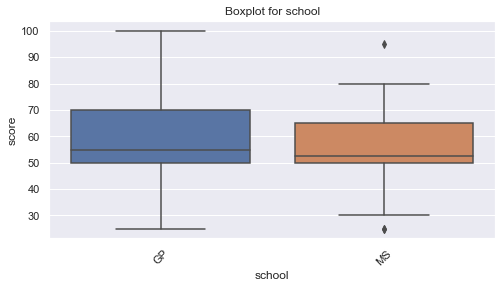

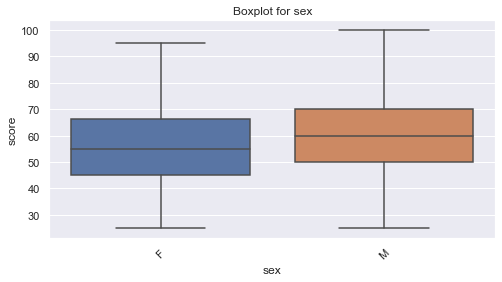

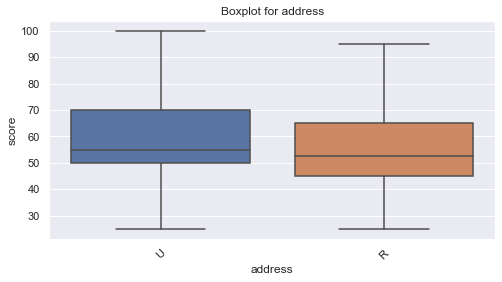

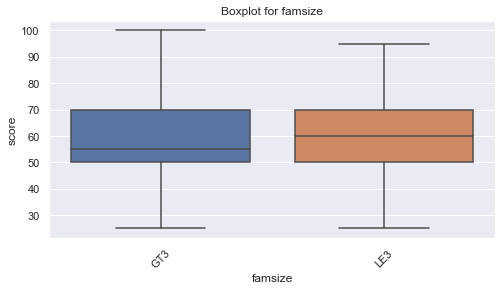

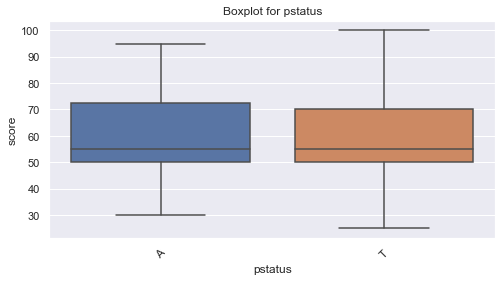

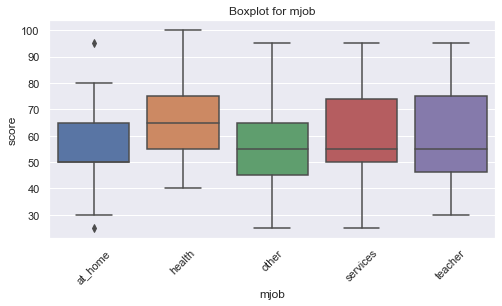

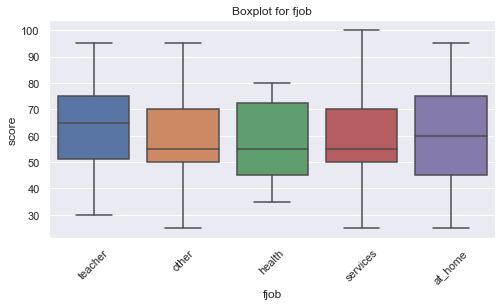

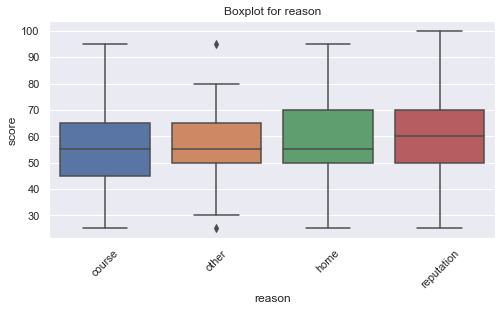

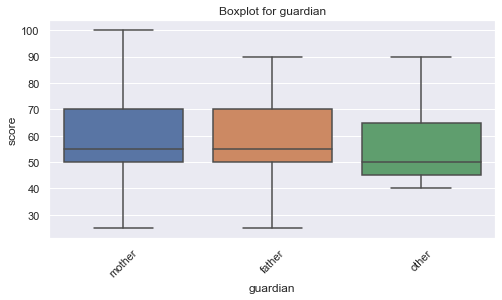

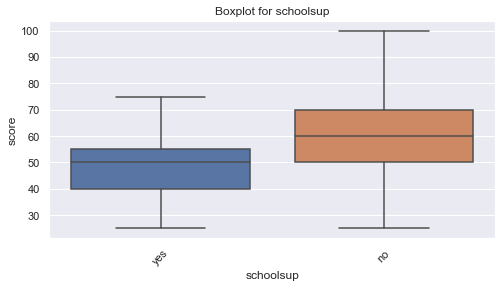

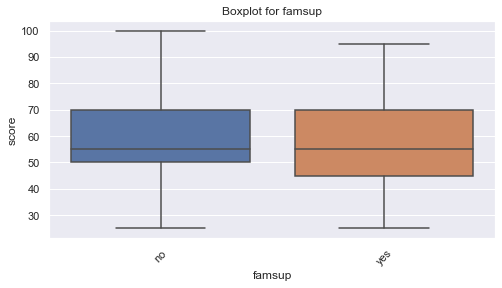

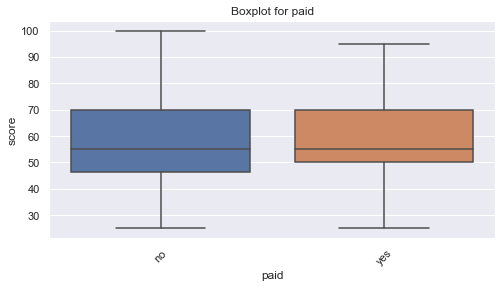

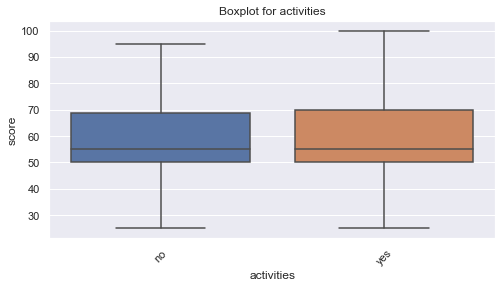

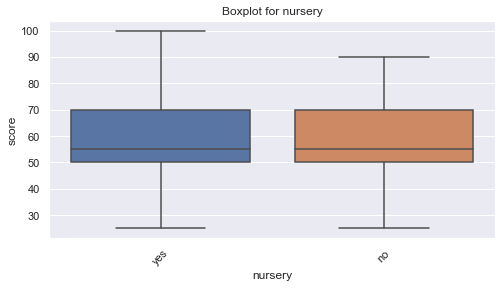

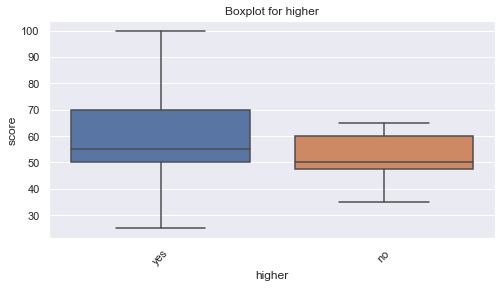

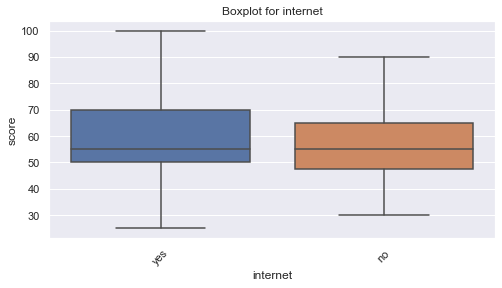

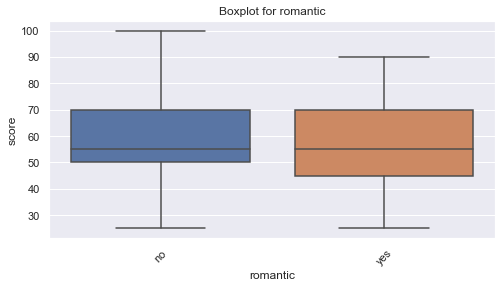

In [195]:
for col in nom_varlist:
    get_boxplot(col)

boxplots shows us, that there are not differences between the score variables and all other variables were tested. Only sex, mjob and fjob, schoolsup, address hast any differences in distributions. 
- Let's check it
- in part I we saw that score is normal distributed -> ttest would deliver us quick results regarding statistical denpdencies between variables

In [198]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [199]:
for col in nom_varlist:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup


# CONCLUSION:

Part I and part II deliver, that there are following variables, which we wil use for the modelling:
- 'fedu', 'traveltime', 'famrel', 'freetime', 'health', 'mjob'

In [204]:
var_for_model = ['score', 'fedu', 'traveltime',
                 'famrel', 'freetime', 'health','sex', 'address', 'mjob', 'schoolsup']

In [205]:
stud_math_for_model = stud_math.loc[:, var_for_model]
stud_math_for_model.head()

,score,fedu,traveltime,famrel,freetime,health,sex,address,mjob,schoolsup
0,30.0,4.0,2.0,4.0,3.0,3.0,F,U,at_home,yes
1,30.0,1.0,1.0,5.0,3.0,3.0,F,U,at_home,no
2,50.0,1.0,1.0,4.0,3.0,3.0,F,U,at_home,yes
3,75.0,2.0,1.0,3.0,2.0,5.0,F,U,health,no
4,50.0,3.0,1.0,4.0,3.0,5.0,F,U,other,no
